In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/C++ Placement/ML/passwords.csv', error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data['strength'].unique()

array([1, 2, 0])

In [ ]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

password    0
strength    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


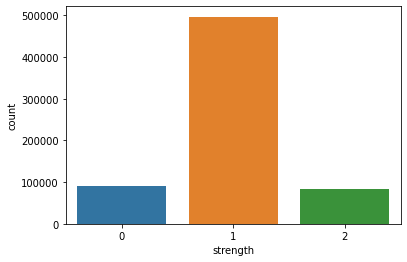

In [ ]:
sns.countplot(data['strength'])
# imbalance dataset

In [ ]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
import random
random.shuffle(password_tuple)

In [ ]:
x = [lebels[0] for lebels in password_tuple]
y = [lebels[1] for lebels in password_tuple]

In [ ]:
print(x[:100])
print(y[:100])

['kzde5577', 'kino3434', 'visi7k1yr', 'visi7k1yr', 'visi7k1yr', 'AVYq1lDE4MgAZfNt', 'lamborghin1', 'v1118714', 'kino3434', 'AVYq1lDE4MgAZfNt', 'lamborghin1', 'lamborghin1', 'u6c8vhow', 'AVYq1lDE4MgAZfNt', 'kino3434', 'as326159', 'jerusalem393', 'WUt9IZzE0OQ7PkNE', 'WUt9IZzE0OQ7PkNE', 'AVYq1lDE4MgAZfNt', 'jytifok873', 'idofo673', 'as326159', 'AVYq1lDE4MgAZfNt', 'intel1', 'faranumar91', 'asv5o9yu', 'jerusalem393', 'klara-tershina3H', 'universe2908', 'klara-tershina3H', 'asv5o9yu', 'as326159', '6975038lp', 'prisonbreak1', 'visi7k1yr', 'visi7k1yr', 'megzy123', 'kswa2mrv', 'elyass15@ajilent-ci', 'prisonbreak1', 'prisonbreak1', 'pHyqueDIyNQ8vmhb', 'AVYq1lDE4MgAZfNt', '52558000aaa', 'as326159', 'faranumar91', 'v1118714', 'sbl571017', '612035180tok', 'yqugu927', 'jytifok873', 'faranumar91', 'v1118714', 'sbl571017', 'cigicigi123', 'lsdlsd1', 'idofo673', 'sbl571017', 'c3h8bkzr', 'g067057895', 'ok>bdk', 'olmaz.', 'lsdlsd1', 'fahad123', 'yitbos77', 'patri1973', 'fahad123', 'ejeko677', 'WUt9IZzE0OQ

In [ ]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [ ]:
X=vectorizer.fit_transform(x)
X.shape

(669639, 127)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape

(535711, 127)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,multi_class='multinomial', max_iter=500)

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
dt=np.array(['abcde'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([0])

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[[ 5459 12475    15]
 [ 3795 92947  2557]
 [   33  5126 11521]]
0.8207917687115465
              precision    recall  f1-score   support

           0       0.59      0.30      0.40     17949
           1       0.84      0.94      0.89     99299
           2       0.82      0.69      0.75     16680

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

